In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [439]:
df = pd.read_csv("income_range.csv")

In [440]:
df.head()

,client_id,age,annual_income,credit_score,num_transactions,avg_transaction_value,region,is_premium,target_spend
0,1,56.0,81832.342955,521.930140,30,NaN,North,0,8523.606707
1,2,69.0,65486.978908,684.291344,27,NaN,West,0,2977.499819
2,3,NaN,27209.450511,524.048089,31,71.553123,South,0,NaN
3,4,32.0,42736.488907,810.590565,29,NaN,East,0,1295.672021
4,5,60.0,69003.667238,639.465432,24,120.570923,West,0,1881.237363


In [441]:
df.duplicated().sum()

np.int64(10)

In [442]:
df = df.drop_duplicates()

In [443]:
df.duplicated().sum()

np.int64(0)

In [444]:
df.isna().sum()

client_id                 0
age                      40
annual_income            40
credit_score             40
num_transactions          0
avg_transaction_value    40
region                   41
is_premium                0
target_spend             40
dtype: int64

In [445]:
numeric_col = df.drop(['region'], axis=1)

In [446]:
numeric_col.head()

,client_id,age,annual_income,credit_score,num_transactions,avg_transaction_value,is_premium,target_spend
0,1,56.0,81832.342955,521.930140,30,NaN,0,8523.606707
1,2,69.0,65486.978908,684.291344,27,NaN,0,2977.499819
2,3,NaN,27209.450511,524.048089,31,71.553123,0,NaN
3,4,32.0,42736.488907,810.590565,29,NaN,0,1295.672021
4,5,60.0,69003.667238,639.465432,24,120.570923,0,1881.237363


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              500 non-null    int64  
 1   age                    460 non-null    float64
 2   annual_income          460 non-null    float64
 3   credit_score           460 non-null    float64
 4   num_transactions       500 non-null    int64  
 5   avg_transaction_value  460 non-null    float64
 6   region                 459 non-null    object 
 7   is_premium             500 non-null    int64  
 8   target_spend           460 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 39.1+ KB


In [448]:
df['is_premium'] = df['is_premium'].astype('category')

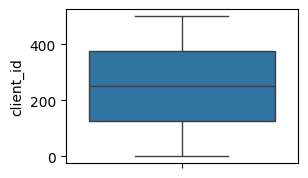

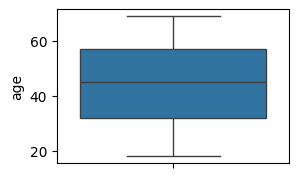

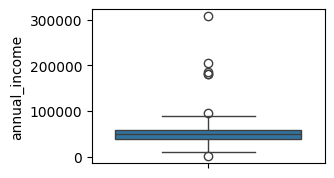

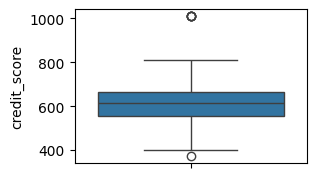

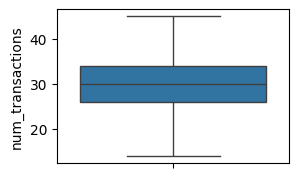

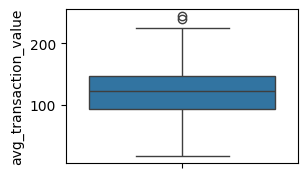

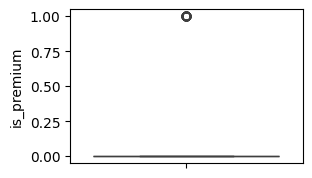

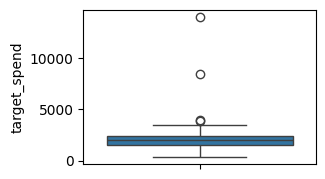

In [449]:
for col in numeric_col.columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(numeric_col[col])
    plt.show()

In [450]:
def outlier (df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    low_wh = q1 - 1.5 * iqr
    up_wh = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], low_wh, up_wh)
    return df

In [451]:
numeric_col2 = df.select_dtypes(include=['int64','float64']).columns.drop('target_spend')

In [452]:
#numeric_col2 = numeric_col2.drop(['target_spend'], axis=1)

In [453]:
numeric_col2

Index(['client_id', 'age', 'annual_income', 'credit_score', 'num_transactions',
       'avg_transaction_value'],
      dtype='object')

In [454]:
df_clean = df.copy()

In [455]:
for col in numeric_col2:
    df_clean = outlier(df_clean, col)

In [456]:
df = df_clean.copy()

In [457]:
df.head()

,client_id,age,annual_income,credit_score,num_transactions,avg_transaction_value,region,is_premium,target_spend
0,1,56.0,81832.342955,521.930140,30,NaN,North,0,8523.606707
1,2,69.0,65486.978908,684.291344,27,NaN,West,0,2977.499819
2,3,NaN,27209.450511,524.048089,31,71.553123,South,0,NaN
3,4,32.0,42736.488907,810.590565,29,NaN,East,0,1295.672021
4,5,60.0,69003.667238,639.465432,24,120.570923,West,0,1881.237363


In [458]:
df.isna().sum()

client_id                 0
age                      40
annual_income            40
credit_score             40
num_transactions          0
avg_transaction_value    40
region                   41
is_premium                0
target_spend             40
dtype: int64

In [459]:
df.shape

(500, 9)

client_id


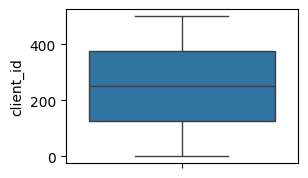

age


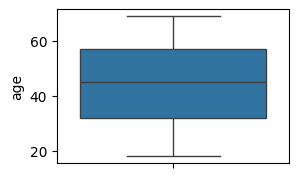

annual_income


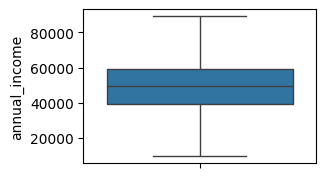

credit_score


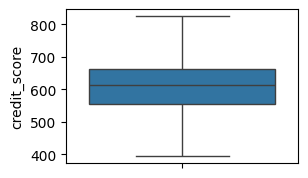

num_transactions


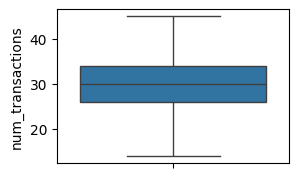

avg_transaction_value


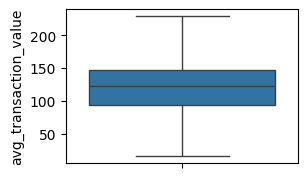

In [460]:
for col3 in numeric_col2:
    print(col3)
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col3])
    plt.show()

In [461]:
df.isna().sum()

client_id                 0
age                      40
annual_income            40
credit_score             40
num_transactions          0
avg_transaction_value    40
region                   41
is_premium                0
target_spend             40
dtype: int64

In [462]:
df['region'] = df['region'].ffill()

In [463]:
df['target_spend'] = df['target_spend'].fillna(df['target_spend'].mean())

In [464]:
df['age'] = df['age'].fillna(df['age'].mean())

In [465]:
df['annual_income'] = df['annual_income'].fillna(df['annual_income'].mean())

In [466]:
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())

In [467]:
df['avg_transaction_value'] = df['avg_transaction_value'].fillna(df['avg_transaction_value'].mean())

In [468]:
df.isna().sum()

client_id                0
age                      0
annual_income            0
credit_score             0
num_transactions         0
avg_transaction_value    0
region                   0
is_premium               0
target_spend             0
dtype: int64

In [469]:
df.head()

,client_id,age,annual_income,credit_score,num_transactions,avg_transaction_value,region,is_premium,target_spend
0,1,56.000000,81832.342955,521.930140,30,121.548404,North,0,8523.606707
1,2,69.000000,65486.978908,684.291344,27,121.548404,West,0,2977.499819
2,3,44.136957,27209.450511,524.048089,31,71.553123,South,0,2026.555535
3,4,32.000000,42736.488907,810.590565,29,121.548404,East,0,1295.672021
4,5,60.000000,69003.667238,639.465432,24,120.570923,West,0,1881.237363


In [470]:
#feature/Target split
x = df.drop(['target_spend'], axis=1)
y = df[['target_spend']]

In [471]:
le = LabelEncoder()
#ss = StandardScaler()

In [472]:
#for col4 in x.columns:
#    if is_numeric_dtype(x[col4]):
#        x[col4] = ss.fit_transform(x[[col4]])
#    else:
#        x[col4] = le.fit_transform(x[col4])

In [473]:
x['region'] = le.fit_transform(x['region'])

In [474]:
x.head()

,client_id,age,annual_income,credit_score,num_transactions,avg_transaction_value,region,is_premium
0,1,56.000000,81832.342955,521.930140,30,121.548404,1,0
1,2,69.000000,65486.978908,684.291344,27,121.548404,3,0
2,3,44.136957,27209.450511,524.048089,31,71.553123,2,0
3,4,32.000000,42736.488907,810.590565,29,121.548404,0,0
4,5,60.000000,69003.667238,639.465432,24,120.570923,3,0


In [475]:
#train test split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [476]:
xtrain.head()

,client_id,age,annual_income,credit_score,num_transactions,avg_transaction_value,region,is_premium
249,250,69.0,78641.249607,613.380181,33,188.775116,0,0
433,434,18.0,60694.976453,613.380181,34,65.314488,3,0
19,20,41.0,28462.067732,555.002658,32,180.446197,2,0
322,323,42.0,62441.083718,679.701346,28,85.268291,0,1
332,333,58.0,52727.993826,630.554836,28,84.186147,0,0


In [477]:
ytrain.head()

,target_spend
249,1701.457497
433,1633.168852
19,2870.600863
322,2965.268513
332,1780.696438


In [478]:
#model implementation
models = {'Linear Model':LinearRegression(),
          'Ridge Model':Ridge(),
          'Lasso Model':Lasso(),
          'KNNR Model': KNeighborsRegressor()}

In [479]:
for model_name, model in models.items():
    print(model_name,":")
    model1 = model.fit(xtrain, ytrain)
    print(f"Train Score:{model1.score(xtrain, ytrain)}")
    print(f"Test Score:{model1.score(xtest, ytest)}")
    pred_y = model1.predict(xtest)
    mae = mean_absolute_error(ytest, pred_y)
    print(f'Mean Absolute Error: {mae}')
    mse = mean_squared_error(ytest, pred_y)
    print(f'Mean Squared Error: {mse}')
    r2 = r2_score(ytest, pred_y)
    print(f'R2 Score: {r2}')
    print("___________________________________")

Linear Model :
Train Score:0.01684388080589605
Test Score:-0.002638354733639714
Mean Absolute Error: 509.2103244172728
Mean Squared Error: 740250.247122447
R2 Score: -0.002638354733639714
___________________________________
Ridge Model :
Train Score:0.01684041638283551
Test Score:-0.0023900181336804494
Mean Absolute Error: 509.20411657678574
Mean Squared Error: 740066.8996286859
R2 Score: -0.0023900181336804494
___________________________________
Lasso Model :
Train Score:0.016829007230054538
Test Score:-0.0023551103737506907
Mean Absolute Error: 509.28797406990054
Mean Squared Error: 740041.1271477183
R2 Score: -0.0023551103737506907
___________________________________
KNNR Model :
Train Score:0.20204288042215757
Test Score:-0.15780304407954593
Mean Absolute Error: 548.1430755955138
Mean Squared Error: 854808.7009165857
R2 Score: -0.15780304407954593
___________________________________


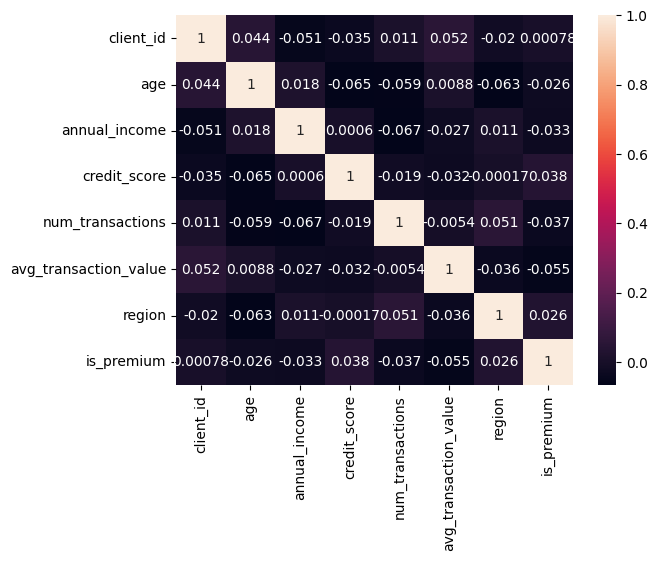

In [481]:
sns.heatmap(x.corr(), annot=True)
plt.show()